## Work
1. 請比較使用 l1, l1_l2 及不同比例下的訓練結果

In [2]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [3]:
train, test = keras.datasets.cifar10.load_data()

In [4]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [5]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [29]:
from keras.regularizers import l1, l2, l1_l2
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], l1 = 0.1, l2 = 0.01):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units,
                                  activation='relu',
                                  name='hidden_layer'+str(i+1),
                                  kernel_regularizer=l1_l2(l1=l1, l2=l2))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units,
                                  activation='relu',
                                  name='hidden_layer'+str(i+1),
                                  kernel_regularizer=l1_l2(l1=l1,l2=l2))(x)
        
    out = keras.layers.Dense(units=output_units, activation='softmax', name='output')(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])                                                                                                                                                
    return model

In [33]:
learning_rate = 1e-3
epochs = 50
batch_size = 256
momentum = 0.95
l1_exp = [1e-2, 1e-4, 1e-8, 1e-12, 0.0]
l2 = [1e-2, 1e-4, 1e-8, 1e-12, 0.0]

In [34]:
from itertools import product

In [35]:
results = {}

for l1, l2 in product(l1_exp, l2):
    keras.backend.clear_session()
    print("Experiment with Regulizer = {}".format(regulizer_ratio))
    model = build_mlp(input_shape=x_train.shape[1:], l1=l1, l2=l2)
    model.summary()
    optimizer = keras.optimizers.SGD(lr=learning_rate, nesterov=True, momentum=momentum)
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=optimizer)
    
    model.fit(x_train, y_train,
              epochs=epochs,
              batch_size=batch_size,
              validation_data=(x_test, y_test),
              shuffle=True)
    
    train_loss = model.history.history['loss']
    valid_loss = model.history.history['val_loss']
    train_acc = model.history.history['accuracy']
    valid_acc = model.history.history['val_accuracy']
    
    exp_name_tag = "exp-ls-{}".format(regulizer_ratio)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""

Experiment with Regulizer = 0.9
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
196/196 [==============================] - 8s 38ms/step - loss: 197.7906 -

196/196 [==============================] - 4s 23ms/step - loss: 2.4614 - accuracy: 0.0957 - val_loss: 2.4613 - val_accuracy: 0.1000
Experiment with Regulizer = 0.9
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
___________________

Epoch 50/50
196/196 [==============================] - 5s 24ms/step - loss: 2.4626 - accuracy: 0.0963 - val_loss: 2.4625 - val_accuracy: 0.1000
Experiment with Regulizer = 0.9
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_______

196/196 [==============================] - 5s 26ms/step - loss: 2.4626 - accuracy: 0.0980 - val_loss: 2.4625 - val_accuracy: 0.1000
Epoch 50/50
196/196 [==============================] - 5s 25ms/step - loss: 2.4626 - accuracy: 0.0970 - val_loss: 2.4626 - val_accuracy: 0.1000
Experiment with Regulizer = 0.9
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)   

Epoch 49/50
196/196 [==============================] - 5s 25ms/step - loss: 2.4626 - accuracy: 0.0978 - val_loss: 2.4625 - val_accuracy: 0.1000
Epoch 50/50
196/196 [==============================] - 5s 25ms/step - loss: 2.4626 - accuracy: 0.0977 - val_loss: 2.4625 - val_accuracy: 0.1000
Experiment with Regulizer = 0.9
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
outpu

196/196 [==============================] - 4s 23ms/step - loss: 2.4626 - accuracy: 0.0968 - val_loss: 2.4625 - val_accuracy: 0.1000
Epoch 49/50
196/196 [==============================] - 5s 24ms/step - loss: 2.4626 - accuracy: 0.0974 - val_loss: 2.4625 - val_accuracy: 0.1000
Epoch 50/50
196/196 [==============================] - 5s 26ms/step - loss: 2.4626 - accuracy: 0.0980 - val_loss: 2.4624 - val_accuracy: 0.1000
Experiment with Regulizer = 0.9
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidde

Epoch 48/50
196/196 [==============================] - 5s 28ms/step - loss: 1.7633 - accuracy: 0.4768 - val_loss: 1.7935 - val_accuracy: 0.4601
Epoch 49/50
196/196 [==============================] - 5s 27ms/step - loss: 1.7591 - accuracy: 0.4782 - val_loss: 1.7892 - val_accuracy: 0.4669
Epoch 50/50
196/196 [==============================] - 6s 29ms/step - loss: 1.7563 - accuracy: 0.4806 - val_loss: 1.7698 - val_accuracy: 0.4776
Experiment with Regulizer = 0.9
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
___________________________________________________________

Epoch 48/50
196/196 [==============================] - 6s 29ms/step - loss: 2.6767 - accuracy: 0.6273 - val_loss: 2.9927 - val_accuracy: 0.5060
Epoch 49/50
196/196 [==============================] - 5s 28ms/step - loss: 2.6442 - accuracy: 0.6241 - val_loss: 2.9633 - val_accuracy: 0.5100
Epoch 50/50
196/196 [==============================] - 5s 26ms/step - loss: 2.6040 - accuracy: 0.6266 - val_loss: 2.8455 - val_accuracy: 0.5350
Experiment with Regulizer = 0.9
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
___________________________________________________________

Epoch 48/50
196/196 [==============================] - 5s 26ms/step - loss: 2.7133 - accuracy: 0.6229 - val_loss: 2.9904 - val_accuracy: 0.5258
Epoch 49/50
196/196 [==============================] - 5s 26ms/step - loss: 2.6709 - accuracy: 0.6279 - val_loss: 2.8935 - val_accuracy: 0.5397
Epoch 50/50
196/196 [==============================] - 5s 24ms/step - loss: 2.6378 - accuracy: 0.6298 - val_loss: 2.8928 - val_accuracy: 0.5331
Experiment with Regulizer = 0.9
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
___________________________________________________________

Epoch 48/50
196/196 [==============================] - 5s 25ms/step - loss: 2.7199 - accuracy: 0.6219 - val_loss: 2.9699 - val_accuracy: 0.5281
Epoch 49/50
196/196 [==============================] - 5s 25ms/step - loss: 2.6824 - accuracy: 0.6262 - val_loss: 3.0274 - val_accuracy: 0.5021
Epoch 50/50
196/196 [==============================] - 5s 27ms/step - loss: 2.6466 - accuracy: 0.6251 - val_loss: 2.9028 - val_accuracy: 0.5351
Experiment with Regulizer = 0.9
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
___________________________________________________________

Epoch 48/50
196/196 [==============================] - 6s 30ms/step - loss: 2.7137 - accuracy: 0.6237 - val_loss: 2.9684 - val_accuracy: 0.5297
Epoch 49/50
196/196 [==============================] - 5s 24ms/step - loss: 2.6752 - accuracy: 0.6246 - val_loss: 3.0061 - val_accuracy: 0.5103
Epoch 50/50
196/196 [==============================] - 4s 23ms/step - loss: 2.6357 - accuracy: 0.6270 - val_loss: 2.9516 - val_accuracy: 0.5193
Experiment with Regulizer = 0.9
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
___________________________________________________________

196/196 [==============================] - 5s 27ms/step - loss: 1.6217 - accuracy: 0.5219 - val_loss: 1.6755 - val_accuracy: 0.4950
Epoch 48/50
196/196 [==============================] - 5s 27ms/step - loss: 1.6170 - accuracy: 0.5245 - val_loss: 1.6918 - val_accuracy: 0.4963
Epoch 49/50
196/196 [==============================] - 5s 27ms/step - loss: 1.6155 - accuracy: 0.5248 - val_loss: 1.7188 - val_accuracy: 0.4855
Epoch 50/50
196/196 [==============================] - 5s 27ms/step - loss: 1.6110 - accuracy: 0.5272 - val_loss: 1.6703 - val_accuracy: 0.5075
Experiment with Regulizer = 0.9
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
___________________________________________________________

Epoch 47/50
196/196 [==============================] - 5s 26ms/step - loss: 1.0540 - accuracy: 0.6794 - val_loss: 1.5680 - val_accuracy: 0.5224
Epoch 48/50
196/196 [==============================] - 5s 26ms/step - loss: 1.0463 - accuracy: 0.6839 - val_loss: 1.5287 - val_accuracy: 0.5261
Epoch 49/50
196/196 [==============================] - 5s 26ms/step - loss: 1.0318 - accuracy: 0.6896 - val_loss: 1.5222 - val_accuracy: 0.5353
Epoch 50/50
196/196 [==============================] - 5s 26ms/step - loss: 1.0202 - accuracy: 0.6918 - val_loss: 1.5108 - val_accuracy: 0.5398
Experiment with Regulizer = 0.9
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_______________________________________________

Epoch 47/50
196/196 [==============================] - 5s 27ms/step - loss: 0.8841 - accuracy: 0.6883 - val_loss: 1.4608 - val_accuracy: 0.5178
Epoch 48/50
196/196 [==============================] - 6s 28ms/step - loss: 0.8814 - accuracy: 0.6909 - val_loss: 1.5592 - val_accuracy: 0.5036
Epoch 49/50
196/196 [==============================] - 5s 28ms/step - loss: 0.8643 - accuracy: 0.6962 - val_loss: 1.3724 - val_accuracy: 0.5446
Epoch 50/50
196/196 [==============================] - 6s 29ms/step - loss: 0.8515 - accuracy: 0.7015 - val_loss: 1.4139 - val_accuracy: 0.5384
Experiment with Regulizer = 0.9
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_______________________________________________

Epoch 47/50
196/196 [==============================] - 6s 31ms/step - loss: 0.9128 - accuracy: 0.6787 - val_loss: 1.4082 - val_accuracy: 0.5223
Epoch 48/50
196/196 [==============================] - 6s 32ms/step - loss: 0.9040 - accuracy: 0.6850 - val_loss: 1.3637 - val_accuracy: 0.5380
Epoch 49/50
196/196 [==============================] - 6s 29ms/step - loss: 0.8906 - accuracy: 0.6890 - val_loss: 1.4675 - val_accuracy: 0.5160
Epoch 50/50
196/196 [==============================] - 6s 30ms/step - loss: 0.8806 - accuracy: 0.6905 - val_loss: 1.5077 - val_accuracy: 0.5052
Experiment with Regulizer = 0.9
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_______________________________________________

Epoch 47/50
196/196 [==============================] - 6s 29ms/step - loss: 0.9162 - accuracy: 0.6781 - val_loss: 1.4152 - val_accuracy: 0.5230
Epoch 48/50
196/196 [==============================] - 5s 28ms/step - loss: 0.9014 - accuracy: 0.6844 - val_loss: 1.3717 - val_accuracy: 0.5274
Epoch 49/50
196/196 [==============================] - 6s 29ms/step - loss: 0.8904 - accuracy: 0.6874 - val_loss: 1.4128 - val_accuracy: 0.5254
Epoch 50/50
196/196 [==============================] - 6s 30ms/step - loss: 0.8750 - accuracy: 0.6935 - val_loss: 1.4074 - val_accuracy: 0.5312
Experiment with Regulizer = 0.9
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_______________________________________________

196/196 [==============================] - 7s 36ms/step - loss: 1.6260 - accuracy: 0.5198 - val_loss: 1.7335 - val_accuracy: 0.4769
Epoch 47/50
196/196 [==============================] - 7s 37ms/step - loss: 1.6226 - accuracy: 0.5197 - val_loss: 1.7305 - val_accuracy: 0.4740
Epoch 48/50
196/196 [==============================] - 7s 35ms/step - loss: 1.6181 - accuracy: 0.5202 - val_loss: 1.7369 - val_accuracy: 0.4812
Epoch 49/50
196/196 [==============================] - 7s 35ms/step - loss: 1.6149 - accuracy: 0.5224 - val_loss: 1.7258 - val_accuracy: 0.4732
Epoch 50/50
196/196 [==============================] - 7s 36ms/step - loss: 1.6118 - accuracy: 0.5217 - val_loss: 1.6995 - val_accuracy: 0.4917
Experiment with Regulizer = 0.9
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_______________________________________________

Epoch 46/50
196/196 [==============================] - 6s 32ms/step - loss: 1.0719 - accuracy: 0.6728 - val_loss: 1.5758 - val_accuracy: 0.5147
Epoch 47/50
196/196 [==============================] - 6s 32ms/step - loss: 1.0627 - accuracy: 0.6758 - val_loss: 1.7185 - val_accuracy: 0.4829
Epoch 48/50
196/196 [==============================] - 6s 32ms/step - loss: 1.0538 - accuracy: 0.6810 - val_loss: 1.5478 - val_accuracy: 0.5232
Epoch 49/50
196/196 [==============================] - 7s 36ms/step - loss: 1.0439 - accuracy: 0.6848 - val_loss: 1.5157 - val_accuracy: 0.5299
Epoch 50/50
196/196 [==============================] - 7s 36ms/step - loss: 1.0262 - accuracy: 0.6889 - val_loss: 1.6648 - val_accuracy: 0.5043
Experiment with Regulizer = 0.9
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
___________________________________

Epoch 46/50
196/196 [==============================] - 6s 29ms/step - loss: 0.9239 - accuracy: 0.6769 - val_loss: 1.4152 - val_accuracy: 0.5204
Epoch 47/50
196/196 [==============================] - 6s 30ms/step - loss: 0.9110 - accuracy: 0.6800 - val_loss: 1.4162 - val_accuracy: 0.5220
Epoch 48/50
196/196 [==============================] - 6s 30ms/step - loss: 0.8965 - accuracy: 0.6838 - val_loss: 1.4055 - val_accuracy: 0.5297
Epoch 49/50
196/196 [==============================] - 6s 31ms/step - loss: 0.8893 - accuracy: 0.6889 - val_loss: 1.4299 - val_accuracy: 0.5245
Epoch 50/50
196/196 [==============================] - 6s 31ms/step - loss: 0.8750 - accuracy: 0.6936 - val_loss: 1.5127 - val_accuracy: 0.5055
Experiment with Regulizer = 0.9
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
___________________________________

Epoch 46/50
196/196 [==============================] - 6s 29ms/step - loss: 0.9133 - accuracy: 0.6779 - val_loss: 1.3415 - val_accuracy: 0.5366
Epoch 47/50
196/196 [==============================] - 6s 30ms/step - loss: 0.8990 - accuracy: 0.6843 - val_loss: 1.3614 - val_accuracy: 0.5312
Epoch 48/50
196/196 [==============================] - 6s 31ms/step - loss: 0.8868 - accuracy: 0.6872 - val_loss: 1.3788 - val_accuracy: 0.5329
Epoch 49/50
196/196 [==============================] - 6s 32ms/step - loss: 0.8809 - accuracy: 0.6896 - val_loss: 1.4112 - val_accuracy: 0.5255
Epoch 50/50
196/196 [==============================] - 7s 36ms/step - loss: 0.8643 - accuracy: 0.6953 - val_loss: 1.3735 - val_accuracy: 0.5404
Experiment with Regulizer = 0.9
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
___________________________________

Epoch 46/50
196/196 [==============================] - 5s 26ms/step - loss: 0.9296 - accuracy: 0.6734 - val_loss: 1.4057 - val_accuracy: 0.5292
Epoch 47/50
196/196 [==============================] - 5s 26ms/step - loss: 0.9220 - accuracy: 0.6765 - val_loss: 1.4836 - val_accuracy: 0.5089
Epoch 48/50
196/196 [==============================] - 5s 26ms/step - loss: 0.9115 - accuracy: 0.6801 - val_loss: 1.3897 - val_accuracy: 0.5231
Epoch 49/50
196/196 [==============================] - 6s 29ms/step - loss: 0.9012 - accuracy: 0.6844 - val_loss: 1.4678 - val_accuracy: 0.5107
Epoch 50/50
196/196 [==============================] - 6s 30ms/step - loss: 0.8856 - accuracy: 0.6884 - val_loss: 1.4055 - val_accuracy: 0.5226
Experiment with Regulizer = 0.9
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
___________________________________

196/196 [==============================] - 6s 31ms/step - loss: 1.6312 - accuracy: 0.5187 - val_loss: 1.6737 - val_accuracy: 0.5071
Epoch 46/50
196/196 [==============================] - 6s 33ms/step - loss: 1.6278 - accuracy: 0.5178 - val_loss: 1.7021 - val_accuracy: 0.4898
Epoch 47/50
196/196 [==============================] - 6s 32ms/step - loss: 1.6225 - accuracy: 0.5203 - val_loss: 1.6884 - val_accuracy: 0.5002
Epoch 48/50
196/196 [==============================] - 6s 31ms/step - loss: 1.6177 - accuracy: 0.5230 - val_loss: 1.6672 - val_accuracy: 0.5004
Epoch 49/50
196/196 [==============================] - 5s 28ms/step - loss: 1.6183 - accuracy: 0.5216 - val_loss: 1.6747 - val_accuracy: 0.5031
Epoch 50/50
196/196 [==============================] - 5s 27ms/step - loss: 1.6117 - accuracy: 0.5261 - val_loss: 1.6657 - val_accuracy: 0.5061
Experiment with Regulizer = 0.9
Model: "model"
_________________________________________________________________
Layer (type)                 Output

Epoch 45/50
196/196 [==============================] - 4s 23ms/step - loss: 1.0828 - accuracy: 0.6707 - val_loss: 1.5370 - val_accuracy: 0.5189
Epoch 46/50
196/196 [==============================] - 5s 23ms/step - loss: 1.0721 - accuracy: 0.6741 - val_loss: 1.4769 - val_accuracy: 0.5395
Epoch 47/50
196/196 [==============================] - 5s 23ms/step - loss: 1.0638 - accuracy: 0.6787 - val_loss: 1.4800 - val_accuracy: 0.5402
Epoch 48/50
196/196 [==============================] - 4s 23ms/step - loss: 1.0518 - accuracy: 0.6808 - val_loss: 1.6368 - val_accuracy: 0.5087
Epoch 49/50
196/196 [==============================] - 5s 23ms/step - loss: 1.0422 - accuracy: 0.6831 - val_loss: 1.5847 - val_accuracy: 0.5119
Epoch 50/50
196/196 [==============================] - 5s 26ms/step - loss: 1.0290 - accuracy: 0.6881 - val_loss: 1.5724 - val_accuracy: 0.5172
Experiment with Regulizer = 0.9
Model: "model"
_________________________________________________________________
Layer (type)           

Epoch 45/50
196/196 [==============================] - 5s 23ms/step - loss: 0.9285 - accuracy: 0.6752 - val_loss: 1.3914 - val_accuracy: 0.5319
Epoch 46/50
196/196 [==============================] - 5s 24ms/step - loss: 0.9141 - accuracy: 0.6805 - val_loss: 1.3535 - val_accuracy: 0.5366
Epoch 47/50
196/196 [==============================] - 4s 23ms/step - loss: 0.9034 - accuracy: 0.6832 - val_loss: 1.4180 - val_accuracy: 0.5243
Epoch 48/50
196/196 [==============================] - 5s 23ms/step - loss: 0.8867 - accuracy: 0.6889 - val_loss: 1.3706 - val_accuracy: 0.5377
Epoch 49/50
196/196 [==============================] - 4s 23ms/step - loss: 0.8828 - accuracy: 0.6915 - val_loss: 1.3749 - val_accuracy: 0.5422
Epoch 50/50
196/196 [==============================] - 5s 23ms/step - loss: 0.8666 - accuracy: 0.6977 - val_loss: 1.3950 - val_accuracy: 0.5269
Experiment with Regulizer = 0.9
Model: "model"
_________________________________________________________________
Layer (type)           

196/196 [==============================] - 5s 25ms/step - loss: 0.9527 - accuracy: 0.6642 - val_loss: 1.4034 - val_accuracy: 0.5205
Epoch 45/50
196/196 [==============================] - 5s 26ms/step - loss: 0.9435 - accuracy: 0.6697 - val_loss: 1.3906 - val_accuracy: 0.5274
Epoch 46/50
196/196 [==============================] - 5s 27ms/step - loss: 0.9313 - accuracy: 0.6736 - val_loss: 1.4158 - val_accuracy: 0.5211
Epoch 47/50
196/196 [==============================] - 6s 32ms/step - loss: 0.9163 - accuracy: 0.6791 - val_loss: 1.4470 - val_accuracy: 0.5099
Epoch 48/50
196/196 [==============================] - 5s 24ms/step - loss: 0.9017 - accuracy: 0.6823 - val_loss: 1.4864 - val_accuracy: 0.5017
Epoch 49/50
196/196 [==============================] - 5s 25ms/step - loss: 0.8933 - accuracy: 0.6868 - val_loss: 1.3830 - val_accuracy: 0.5332
Epoch 50/50
196/196 [==============================] - 5s 26ms/step - loss: 0.8783 - accuracy: 0.6923 - val_loss: 1.3980 - val_accuracy: 0.5240
Expe

Epoch 44/50
196/196 [==============================] - 4s 21ms/step - loss: 0.9578 - accuracy: 0.6621 - val_loss: 1.4053 - val_accuracy: 0.5184
Epoch 45/50
196/196 [==============================] - 4s 22ms/step - loss: 0.9433 - accuracy: 0.6669 - val_loss: 1.3932 - val_accuracy: 0.5300
Epoch 46/50
196/196 [==============================] - 4s 23ms/step - loss: 0.9337 - accuracy: 0.6706 - val_loss: 1.3432 - val_accuracy: 0.5431
Epoch 47/50
196/196 [==============================] - 4s 23ms/step - loss: 0.9213 - accuracy: 0.6759 - val_loss: 1.3711 - val_accuracy: 0.5304
Epoch 48/50
196/196 [==============================] - 4s 22ms/step - loss: 0.9061 - accuracy: 0.6814 - val_loss: 1.3808 - val_accuracy: 0.5305
Epoch 49/50
196/196 [==============================] - 4s 23ms/step - loss: 0.8913 - accuracy: 0.6875 - val_loss: 1.3931 - val_accuracy: 0.5206
Epoch 50/50
196/196 [==============================] - 4s 23ms/step - loss: 0.8809 - accuracy: 0.6910 - val_loss: 1.3619 - val_accuracy:

'Code Here\n撰寫你的訓練流程並將結果用 dictionary 紀錄\n'

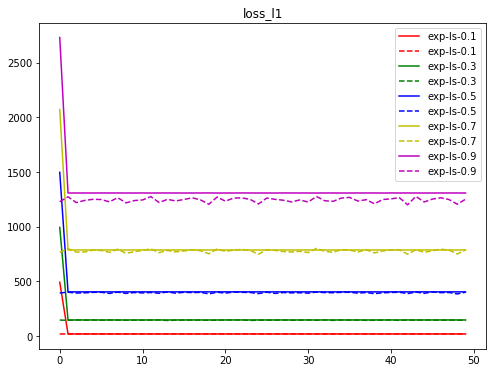

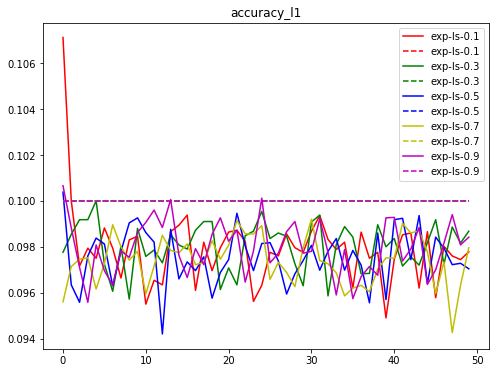

'Code Here\n將結果繪出\n'

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ['r', 'g', 'b', 'y', 'm', 'k']

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])), results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])), results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title('loss_l1')
plt.ylim()
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])), results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])), results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title('accuracy_l1')
plt.legend()
plt.show()

"""Code Here
將結果繪出
"""

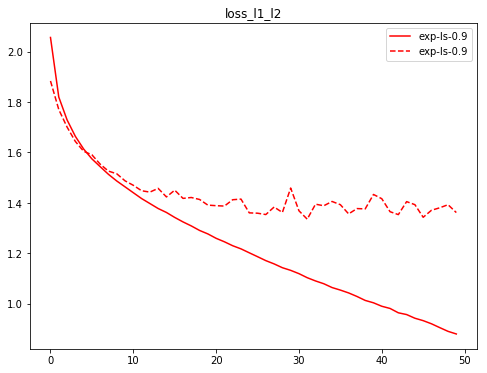

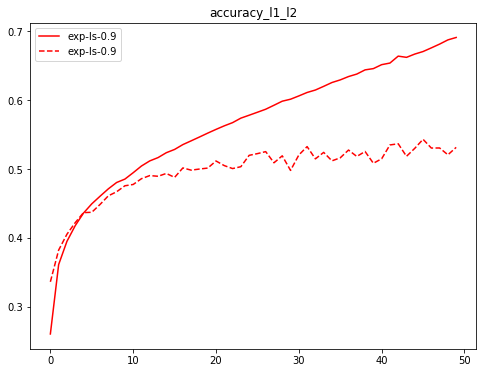

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ['r', 'g', 'b', 'y', 'm', 'k']

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])), results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])), results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title('loss_l1_l2')
plt.ylim()
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])), results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])), results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title('accuracy_l1_l2')
plt.legend()
plt.show()

In [38]:
results

{'exp-ls-0.9': {'train-loss': [2.0556464195251465,
   1.8196609020233154,
   1.7292793989181519,
   1.663941740989685,
   1.613782286643982,
   1.5746337175369263,
   1.5437732934951782,
   1.5133354663848877,
   1.4870483875274658,
   1.463855266571045,
   1.440548300743103,
   1.4173979759216309,
   1.3977152109146118,
   1.3779523372650146,
   1.362312912940979,
   1.3426425457000732,
   1.3249127864837646,
   1.3090014457702637,
   1.2910935878753662,
   1.2773454189300537,
   1.2598838806152344,
   1.2461572885513306,
   1.2305160760879517,
   1.21812903881073,
   1.2025346755981445,
   1.187148094177246,
   1.1714811325073242,
   1.1585469245910645,
   1.1434366703033447,
   1.1329760551452637,
   1.1199101209640503,
   1.1038539409637451,
   1.0910133123397827,
   1.0799318552017212,
   1.0648084878921509,
   1.0547921657562256,
   1.0435221195220947,
   1.0295997858047485,
   1.0138492584228516,
   1.004409670829773,
   0.9907612204551697,
   0.982037365436554,
   0.96481037139